## Question 1

### Import the necessary libraries

In [1]:
import pandas as pd
# pd.set_option('display.max_columns',50)
# pd.set_option('display.max_rows',10)

### reading users data

In [2]:
users = pd.read_csv("u.user",sep="|")
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


### mean age per occupation

In [3]:
users_groupby_occupation =users.groupby(by="occupation")
users_groupby_occupation.first() #getting only first values in each group

,user_id,age,gender,zip_code
occupation,,,,
administrator,7,57,M,91344
artist,23,30,F,48197
doctor,138,46,M,53211
educator,13,47,M,29206
engineer,25,39,M,55107
entertainment,16,21,M,10309
executive,6,42,M,98101
healthcare,60,50,M,06472
homemaker,20,42,F,95660


In [4]:
# Groupby one column and return the mean of only particular column in
# the group.
# df.groupby('A')['B'].mean()
users_groupby_occupation['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

### Discover the Male ratio per occupation and sort it from the most to the least

In [5]:
ratio = pd.DataFrame(users_groupby_occupation['gender'].value_counts()/users_groupby_occupation['user_id'].count(), columns=["Ratio"])
ratio

Ratio
occupation    gender          
administrator M       0.544304
              F       0.455696
artist        M       0.535714
              F       0.464286
doctor        M       1.000000
educator      M       0.726316
              F       0.273684
engineer      M       0.970149
              F       0.029851
entertainment M       0.888889
              F       0.111111
executive     M       0.906250
              F       0.093750
healthcare    F       0.687500
              M       0.312500
homemaker     F       0.857143
              M       0.142857
lawyer        M       0.833333
              F       0.166667
librarian     F       0.568627
              M       0.431373
marketing     M       0.615385
              F       0.384615
none          M       0.555556
              F       0.444444
other         M       0.657143
              F       0.342857
programmer    M       0.909091
              F       0.090909
retired       M       0.928571
              F       0.071429
salesman      M       0.750000
              F       0.250000
scientist     M       0.903226
              F       0.096774
student       M       0.693878
              F       0.306122
technician    M       0.962963
              F       0.037037
writer        M       0.577778
              F       0.422222

In [6]:
ratio_unstack = ratio.unstack()
ratio_unstack

Ratio          
gender                F         M
occupation                       
administrator  0.455696  0.544304
artist         0.464286  0.535714
doctor              NaN  1.000000
educator       0.273684  0.726316
engineer       0.029851  0.970149
entertainment  0.111111  0.888889
executive      0.093750  0.906250
healthcare     0.687500  0.312500
homemaker      0.857143  0.142857
lawyer         0.166667  0.833333
librarian      0.568627  0.431373
marketing      0.384615  0.615385
none           0.444444  0.555556
other          0.342857  0.657143
programmer     0.090909  0.909091
retired        0.071429  0.928571
salesman       0.250000  0.750000
scientist      0.096774  0.903226
student        0.306122  0.693878
technician     0.037037  0.962963
writer         0.422222  0.577778

In [7]:
ratio_unstack.index

Index(['administrator', 'artist', 'doctor', 'educator', 'engineer',
       'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer',
       'librarian', 'marketing', 'none', 'other', 'programmer', 'retired',
       'salesman', 'scientist', 'student', 'technician', 'writer'],
      dtype='object', name='occupation')

In [8]:
ratio_unstack.columns

MultiIndex([('Ratio', 'F'),
            ('Ratio', 'M')],
           names=[None, 'gender'])

In [9]:
ratio_unstack = ratio_unstack.drop(('Ratio', 'F'), axis=1) # Droping the Female ratio
#sort
ratio_unstack.sort_values(by=('Ratio', 'M'),ascending=False)
ratio_unstack

,Ratio
gender,M
occupation,
administrator,0.544304
artist,0.535714
doctor,1.000000
educator,0.726316
engineer,0.970149
entertainment,0.888889
executive,0.906250
healthcare,0.312500


###  For each occupation, calculate the minimum and maximum ages


In [10]:
ages_per_occupation = pd.DataFrame(data=users_groupby_occupation['age'].max())
ages_per_occupation.columns = ['Max_Age']
ages_per_occupation['Min_Age'] = pd.DataFrame(data=users_groupby_occupation['age'].min())
ages_per_occupation

,Max_Age,Min_Age
occupation,,
administrator,70,21
artist,48,19
doctor,64,28
educator,63,23
engineer,70,22
entertainment,50,15
executive,69,22
healthcare,62,22
homemaker,50,20


### For each combination of occupation and sex, calculate the mean age

In [11]:
occupation_gender = users.groupby(by=['occupation','gender'])
occupation_gender_mean_age = pd.DataFrame(occupation_gender['age'].mean())
occupation_gender_mean_age.columns = ['Mean_Age']
occupation_gender_mean_age

Mean_Age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [12]:
occupation_gender_mean_age.unstack()

Mean_Age           
gender                 F          M
occupation                         
administrator  40.638889  37.162791
artist         30.307692  32.333333
doctor               NaN  43.571429
educator       39.115385  43.101449
engineer       29.500000  36.600000
entertainment  31.000000  29.000000
executive      44.000000  38.172414
healthcare     39.818182  45.400000
homemaker      34.166667  23.000000
lawyer         39.500000  36.200000
librarian      40.000000  40.000000
marketing      37.200000  37.875000
none           36.500000  18.600000
other          35.472222  34.028986
programmer     32.166667  33.216667
retired        70.000000  62.538462
salesman       27.000000  38.555556
scientist      28.333333  36.321429
student        20.750000  22.669118
technician     38.000000  32.961538
writer         37.631579  35.346154

### For each occupation present the percentage of women and men

In [13]:
sex_percentage_per_occupation = pd.DataFrame(100*(users_groupby_occupation['gender'].value_counts()/users_groupby_occupation['user_id'].count()), columns=["Percentage"])
sex_percentage_per_occupation_unstack = sex_percentage_per_occupation.unstack()
sex_percentage_per_occupation_unstack

Percentage            
gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778

## Question 2

In [14]:
euro12 = pd.read_csv("Euro_2012_stats_TEAM.csv")
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


### Select only the Goal column

In [15]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### How many team participated in the Euro2012?

In [16]:
euro12['Team'].count()

16

### What is the number of columns in the dataset?

In [17]:
euro12.shape[1]

35

In [18]:
# Another way
len(euro12.columns)

35

### View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [19]:
discipline = euro12.loc[:,['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Sort the teams by Red Cards, then to Yellow Cards

In [20]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


### Calculate the mean Yellow Cards given per Team

In [21]:
discipline_indexed = discipline.set_index('Team')
discipline_indexed

,Yellow Cards,Red Cards
Team,,
Croatia,9,0
Czech Republic,7,0
Denmark,4,0
England,5,0
France,6,0
Germany,4,0
Greece,9,1
Italy,16,0
Netherlands,5,0


In [22]:
discipline_indexed['Yellow Cards']

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

### Filter teams that scored more than 6 goals

In [23]:
euro12.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

In [24]:
euro12_indexed = euro12.set_index(keys=['Team'])
euro12_indexed

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Team,,,,,,,,,,,,,,,,,,,,,
Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,...,13,81.3%,41,62,2,9,0,9,9,16
Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,...,10,66.7%,25,38,8,4,0,7,7,15
England,5,11,18,50.0%,17.2%,40,0,0,0,3,...,22,88.1%,43,45,6,5,0,11,11,16
France,3,22,24,37.9%,6.5%,65,1,0,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,...,10,62.6%,63,49,12,4,0,15,15,17
Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,...,13,65.1%,67,48,12,9,1,12,12,20
Italy,6,34,45,43.0%,7.5%,110,2,0,0,2,...,20,74.1%,101,89,16,16,0,18,18,19
Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,...,12,70.6%,35,30,3,5,0,7,7,15


In [25]:
euro12_indexed.loc[euro12_indexed['Goals'] >=6]

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Team,,,,,,,,,,,,,,,,,,,,,
Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,...,10,62.6%,63,49,12,4,0,15,15,17
Italy,6,34,45,43.0%,7.5%,110,2,0,0,2,...,20,74.1%,101,89,16,16,0,18,18,19
Portugal,6,22,42,34.3%,9.3%,82,6,0,0,2,...,10,71.5%,73,90,10,12,0,14,14,16
Spain,12,42,33,55.9%,16.0%,100,0,1,0,2,...,15,93.8%,102,83,19,11,0,17,17,18


### Select the teams that start with G

In [26]:
euro12.loc[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Select the first 7 columns

In [27]:
euro12.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### Select all columns except the last 3

In [28]:
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### Present only the Shooting Accuracy from England, Italy and Russia

In [29]:
euro12_indexed.loc[['England','Italy','Russia'],['Shooting Accuracy']]

,Shooting Accuracy
Team,
England,50.0%
Italy,43.0%
Russia,22.5%


## Question 3

In [30]:
#required libraries
import numpy as np

### Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4

• The second a random number from 1 to 3

• The third a random number from 10,000 to 30,000

In [31]:
series1 = pd.Series(data=np.random.randint(low=1,high=5,size=100))
series2 = pd.Series(data=np.random.randint(low=1,high=4,size=100))
series3 = pd.Series(data=np.random.randint(low=10000,high=30001,size=100))
print(series1,series2,series3,sep='\n')

0     2
1     4
2     2
3     1
4     1
     ..
95    4
96    1
97    3
98    3
99    2
Length: 100, dtype: int32
0     3
1     3
2     3
3     1
4     2
     ..
95    3
96    3
97    2
98    1
99    1
Length: 100, dtype: int32
0     15304
1     18802
2     21945
3     25319
4     21192
      ...  
95    26055
96    10738
97    23641
98    12103
99    18993
Length: 100, dtype: int32


### Create a DataFrame by joinning the Series by column

In [32]:
### Series as columns
seriesDf = pd.DataFrame({0:series1,1:series2,3:series3})
seriesDf

,0,1,3
0,2,3,15304
1,4,3,18802
2,2,3,21945
3,1,1,25319
4,1,2,21192
...,...,...,...
95,4,3,26055
96,1,3,10738
97,3,2,23641
98,3,1,12103


### Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [33]:
seriesDf.columns = ['bedrs','bathrs','price_sqr_meter']
seriesDf

,bedrs,bathrs,price_sqr_meter
0,2,3,15304
1,4,3,18802
2,2,3,21945
3,1,1,25319
4,1,2,21192
...,...,...,...
95,4,3,26055
96,1,3,10738
97,3,2,23641
98,3,1,12103


### Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [34]:
bigcolumn = pd.DataFrame(data=[series1,series2,series3])
bigcolumn

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2,4,2,1,1,4,4,2,4,1,...,2,1,1,3,1,4,1,3,3,2
1,3,3,3,1,2,3,3,3,1,1,...,2,1,1,3,2,3,3,2,1,1
2,15304,18802,21945,25319,21192,16870,16848,23211,10739,16750,...,19512,22274,20162,14710,25461,26055,10738,23641,12103,18993


### Ops it seems it is going only until index 99. Is it true?
Answer: No, it`s only going upto 3 in row index

### Reindex the DataFrame so it goes from 0 to 299

In [35]:
seriesList = [series1,series2,series3]
bigcolumn = pd.DataFrame()
for series in seriesList:
    bigcolumn = bigcolumn.append(pd.DataFrame(series),ignore_index=True)
bigcolumn

,0
0,2
1,4
2,2
3,1
4,1
...,...
295,26055
296,10738
297,23641
298,12103


## Question 4

### Step 1. Import the necessary libraries
### Step 2. Import the dataset from the attached file wind.txt

In [36]:
wind_data = pd.read_csv('wind.txt',sep=' ', header=0)
wind_data

,Yr,Mo,Dy,Unnamed: 3,Unnamed: 4,RPT,Unnamed: 6,Unnamed: 7,VAL,Unnamed: 9,...,MUL,Unnamed: 30,Unnamed: 31,CLO,Unnamed: 33,Unnamed: 34,BEL,Unnamed: 36,Unnamed: 37,MAL
0,61,NaN,1.0,NaN,1.00,15.04,14.96,13.17,NaN,9.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61,NaN,1.0,NaN,2.00,14.71,NaN,NaN,NaN,10.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61,NaN,1.0,NaN,3.00,18.50,16.88,12.33,10.13,11.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61,NaN,1.0,NaN,4.00,10.58,NaN,6.63,11.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61,NaN,1.0,NaN,5.00,13.33,13.25,11.42,NaN,6.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12.0,27.0,17.58,16.96,17.62,NaN,8.08,13.21,11.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6570,78,12.0,28.0,13.21,NaN,5.46,13.46,NaN,5.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6571,78,12.0,29.0,14.00,10.29,14.42,NaN,8.71,NaN,9.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6572,78,12.0,30.0,18.50,14.04,21.29,NaN,9.13,12.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#using re to fix the the above inconsistence space issue
wind_data = pd.read_csv('wind.txt',sep='\s+', header=0)
wind_data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### Assign it to a variable called data and replace the first 3 columns by a proper datetime index

In [38]:
data =  wind_data
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [39]:
# pd.to_datetime(data.loc[:,['Yr','Mo','Dy']])

In [40]:
date = data.loc[:,['Yr','Mo','Dy']]
date

,Yr,Mo,Dy
0,61,1,1
1,61,1,2
2,61,1,3
3,61,1,4
4,61,1,5
...,...,...,...
6569,78,12,27
6570,78,12,28
6571,78,12,29
6572,78,12,30


In [41]:
date.columns = ['year', 'month','day']
date['year'] = date['year'] + 2000
datetime = pd.to_datetime(date)
datetime

0      2061-01-01
1      2061-01-02
2      2061-01-03
3      2061-01-04
4      2061-01-05
          ...    
6569   2078-12-27
6570   2078-12-28
6571   2078-12-29
6572   2078-12-30
6573   2078-12-31
Length: 6574, dtype: datetime64[ns]

In [42]:
date

,year,month,day
0,2061,1,1
1,2061,1,2
2,2061,1,3
3,2061,1,4
4,2061,1,5
...,...,...,...
6569,2078,12,27
6570,2078,12,28
6571,2078,12,29
6572,2078,12,30


In [43]:
date['year']

0       2061
1       2061
2       2061
3       2061
4       2061
        ... 
6569    2078
6570    2078
6571    2078
6572    2078
6573    2078
Name: year, Length: 6574, dtype: int64

In [44]:
#removing the Yr, Mo, Dy column
data.drop(labels=['Yr','Mo','Dy'], axis=1, inplace=True)

In [45]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [46]:
#adding new datatime column
data['datetime'] = datetime
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,datetime
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,2078-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,2078-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,2078-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,2078-12-30


In [47]:
#changing the index of the datatime column
data = data.reindex([ 'datetime','RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO',
       'BEL', 'MAL'],axis=1)

In [48]:
data

,datetime,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,2078-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,2078-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,2078-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,2078-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [49]:
t = data.loc[6573,'datetime']

In [50]:
t.year-60

2018

In [51]:
# subtracing 60 years from each datetime stmap
t.to_datetime64()-1892000000000000000

numpy.datetime64('2019-01-16T20:26:40.000000000')

In [52]:
print(int(1.892e+18))

1892000000000000000


In [53]:
data['datetime'] = data['datetime'].apply(lambda x: x.to_datetime64()-1892000000000000000)
data

,datetime,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2001-01-17 20:26:40,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2001-01-18 20:26:40,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2001-01-19 20:26:40,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2001-01-20 20:26:40,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2001-01-21 20:26:40,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,2019-01-12 20:26:40,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,2019-01-13 20:26:40,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,2019-01-14 20:26:40,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,2019-01-15 20:26:40,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [54]:
data = data.set_index('datetime')

In [55]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
datetime,,,,,,,,,,,,
2001-01-17 20:26:40,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2001-01-18 20:26:40,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2001-01-19 20:26:40,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2001-01-20 20:26:40,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2001-01-21 20:26:40,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-12 20:26:40,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
2019-01-13 20:26:40,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
2019-01-14 20:26:40,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


### Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [56]:
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Compute how many non-missing values there are in total.

In [57]:
wind_data.isna().sum().sum()

31

In [58]:
#dropping null values
data.dropna(inplace=True)

In [59]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
datetime,,,,,,,,,,,,
2001-01-20 20:26:40,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2001-01-21 20:26:40,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
2001-01-22 20:26:40,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
2001-01-23 20:26:40,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
2001-01-24 20:26:40,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-12 20:26:40,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
2019-01-13 20:26:40,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
2019-01-14 20:26:40,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


### Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [60]:
# Mean windspeed per location over all time
data.mean()

RPT    12.359979
VAL    10.640267
ROS    11.656396
KIL     6.298587
SHA    10.448923
BIR     7.085066
DUB     9.793006
CLA     8.486601
MUL     8.490257
CLO     8.696705
BEL    13.110668
MAL    15.603129
dtype: float64

In [61]:
# Mean windspeed overall
data.mean().mean()

10.222465245951712

### Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [62]:
min_data = data.min()
max_data = data.max()
mean_data = data.mean()
std_data = data.std()

In [63]:
loc_stats = pd.DataFrame(data={'min_windspeed' : min_data, 'max_windspeed' : max_data, 'mean_windspeed' : mean_data, 'std_windspeed' : std_data})
loc_stats

,min_windspeed,max_windspeed,mean_windspeed,std_windspeed
RPT,0.67,35.80,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.50,33.84,11.656396,5.007805
KIL,0.00,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988
BIR,0.00,26.16,7.085066,3.967735
DUB,0.00,30.37,9.793006,4.978030
CLA,0.00,31.08,8.486601,4.498299
MUL,0.00,25.88,8.490257,4.165947
CLO,0.04,28.21,8.696705,4.500488


### Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day

In [64]:
t = data.index[0]
t

Timestamp('2001-01-20 20:26:40')

In [65]:
t.day_name()

'Saturday'

In [66]:
datetime = pd.DataFrame(data.index)
datetime['datetime']

0      2001-01-20 20:26:40
1      2001-01-21 20:26:40
2      2001-01-22 20:26:40
3      2001-01-23 20:26:40
4      2001-01-24 20:26:40
               ...        
6541   2019-01-12 20:26:40
6542   2019-01-13 20:26:40
6543   2019-01-14 20:26:40
6544   2019-01-15 20:26:40
6545   2019-01-16 20:26:40
Name: datetime, Length: 6546, dtype: datetime64[ns]

In [67]:
pd.DataFrame(data.index)['datetime'].apply(lambda x: x.day_name())

0        Saturday
1          Sunday
2          Monday
3         Tuesday
4       Wednesday
          ...    
6541     Saturday
6542       Sunday
6543       Monday
6544      Tuesday
6545    Wednesday
Name: datetime, Length: 6546, dtype: object

In [68]:
day = datetime['datetime'].apply(lambda x: x.day_name())
day

0        Saturday
1          Sunday
2          Monday
3         Tuesday
4       Wednesday
          ...    
6541     Saturday
6542       Sunday
6543       Monday
6544      Tuesday
6545    Wednesday
Name: datetime, Length: 6546, dtype: object

In [69]:
data['day'] = list(day)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,day
datetime,,,,,,,,,,,,,
2001-01-20 20:26:40,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,Saturday
2001-01-21 20:26:40,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,Sunday
2001-01-22 20:26:40,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17,Monday
2001-01-23 20:26:40,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79,Tuesday
2001-01-24 20:26:40,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-12 20:26:40,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,Saturday
2019-01-13 20:26:40,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,Sunday
2019-01-14 20:26:40,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,Monday


In [70]:
# day #The problem was index conflict, in data the indexes are timestamps (201X-XX-XX) etc but in day it was 0, 1, 2. Therefore, we neglected the indexes by converting the dataframe into a list of only strings.

In [71]:
wind_data_groupby_day = data.groupby('day')
wind_data_groupby_day.first()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
day,,,,,,,,,,,,
Friday,13.37,11.12,19.50,8.33,9.71,6.54,11.42,7.79,8.54,9.00,8.58,11.83
Monday,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
Saturday,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
Sunday,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
Thursday,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37
Tuesday,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
Wednesday,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46


In [72]:
min_data_per_day = wind_data_groupby_day.min()
max_data_per_day = wind_data_groupby_day.max()
mean_data_per_day = wind_data_groupby_day.mean()
std_data_per_day = wind_data_groupby_day.std()

In [73]:
day_stats = pd.DataFrame(data={'min_windspeed' : min_data_per_day.min(axis=1), 'max_windspeed' : max_data_per_day.max(axis=1), 'mean_windspeed' : mean_data_per_day.mean(axis=1), 'std_windspeed' : std_data_per_day.std(axis=1)})
day_stats

,min_windspeed,max_windspeed,mean_windspeed,std_windspeed
day,,,,
Friday,0.00,40.12,10.183250,0.880331
Monday,0.00,42.54,10.128678,0.856465
Saturday,0.00,41.25,10.230907,0.896083
Sunday,0.08,42.38,10.209019,0.866313
Thursday,0.00,38.79,10.243227,0.864107
Tuesday,0.00,38.20,10.269208,0.841745
Wednesday,0.00,40.37,10.292775,0.851472


In [74]:
min_data_per_day.min(axis=1)

day
Friday       0.00
Monday       0.00
Saturday     0.00
Sunday       0.08
Thursday     0.00
Tuesday      0.00
Wednesday    0.00
dtype: float64

In [75]:
# min_data_per_day.max(axis=1)

### Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January

In [76]:
data.loc[data.index.month_name() == 'January',['RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO','BEL', 'MAL']].mean()

RPT    14.292937
VAL    12.027928
ROS    13.362072
KIL     6.714306
SHA    10.904306
BIR     7.536468
DUB    11.498054
CLA     8.974432
MUL     9.142757
CLO     9.523838
BEL    13.896486
MAL    18.152685
dtype: float64

In [77]:
data.columns

Index(['RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO',
       'BEL', 'MAL', 'day'],
      dtype='object')

### Downsample the record to a yearly frequency for each location

In [78]:
data.resample('Y').first() # 'Y' For year.'M' for month, 'T' for minute, 'S' for second. D for day

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,day
datetime,,,,,,,,,,,,,
2001-12-31,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,Saturday
2002-12-31,9.29,8.63,9.04,6.50,9.50,7.04,6.92,5.46,7.12,7.54,7.38,6.50,Tuesday
2003-12-31,17.83,12.62,13.25,12.42,13.13,11.58,16.54,9.67,12.42,16.54,15.09,25.58,Wednesday
2004-12-31,9.42,9.83,10.37,3.25,6.00,4.88,4.92,4.50,2.29,3.79,6.00,4.25,Thursday
2005-12-31,15.09,15.92,8.96,6.50,11.25,8.08,9.87,12.67,9.29,13.79,24.41,20.00,Saturday
2006-12-31,15.67,14.92,11.67,5.83,14.00,9.04,8.21,9.75,7.38,10.71,15.50,13.88,Sunday
2007-12-31,10.79,10.75,6.79,4.00,10.67,7.33,14.25,7.96,8.29,10.08,17.88,19.87,Monday
2008-12-31,6.63,1.92,9.08,3.13,5.46,0.75,6.13,2.33,1.87,2.13,5.79,14.21,Tuesday
2009-12-31,14.50,9.87,9.54,3.75,11.42,5.88,4.50,7.17,6.38,5.41,11.75,8.83,Thursday


### Downsample the record to a monthly frequency for each location.

In [79]:
data.resample('M').first()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,day
datetime,,,,,,,,,,,,,
2001-01-31,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,Saturday
2001-02-28,16.42,11.25,15.67,4.71,11.34,6.92,9.25,8.79,8.21,7.33,13.04,9.04,Thursday
2001-03-31,22.50,19.70,19.41,15.34,16.13,14.62,16.08,14.12,13.96,16.58,28.62,19.67,Thursday
2001-04-30,4.92,12.92,5.25,4.29,8.96,7.04,2.75,5.13,6.00,7.29,20.12,11.42,Sunday
2001-05-31,5.17,6.42,3.92,2.67,3.37,1.54,2.46,2.29,3.58,4.00,5.75,6.79,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30,10.88,6.25,8.12,6.13,10.58,8.87,10.83,8.25,9.92,9.21,12.75,16.17,Saturday
2018-10-31,11.50,11.87,11.34,7.46,13.59,13.21,14.96,13.21,13.33,11.17,19.25,25.17,Monday
2018-11-30,15.34,14.42,10.04,8.58,15.37,9.75,15.83,12.62,12.29,12.50,19.55,28.21,Thursday


### Downsample the record to a weekly frequency for each location.

In [80]:
data.resample('7D').count()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,day
datetime,,,,,,,,,,,,,
2001-01-20,7,7,7,7,7,7,7,7,7,7,7,7,7
2001-01-27,7,7,7,7,7,7,7,7,7,7,7,7,7
2001-02-03,6,6,6,6,6,6,6,6,6,6,6,6,6
2001-02-10,6,6,6,6,6,6,6,6,6,6,6,6,6
2001-02-17,7,7,7,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-15,7,7,7,7,7,7,7,7,7,7,7,7,7
2018-12-22,7,7,7,7,7,7,7,7,7,7,7,7,7
2018-12-29,7,7,7,7,7,7,7,7,7,7,7,7,7


### Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [81]:
week_resample = data.resample('7D')
week_resample.first()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,day
datetime,,,,,,,,,,,,,
2001-01-20,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,Saturday
2001-01-27,10.58,9.87,8.42,2.79,8.71,7.25,7.54,8.33,5.71,8.67,20.71,16.92,Saturday
2001-02-03,4.92,3.42,7.29,1.04,3.67,3.17,3.71,2.79,1.92,2.71,6.87,7.83,Sunday
2001-02-10,13.62,11.17,12.67,6.04,10.00,9.42,9.25,8.71,7.12,12.04,14.04,17.50,Saturday
2001-02-17,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-15,14.46,10.00,10.17,3.33,9.59,8.83,4.38,5.75,10.41,9.13,13.13,22.95,Saturday
2018-12-22,29.33,23.87,25.37,16.04,24.46,19.50,24.54,18.58,21.00,20.58,21.67,34.46,Saturday
2018-12-29,18.84,24.04,14.37,8.33,18.12,12.17,13.00,13.75,14.17,15.09,21.50,21.37,Saturday


#### Min Windspeed

In [82]:
pd.DataFrame(week_resample.min()).reset_index().iloc[0:52]

,datetime,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,day
0,2001-01-20,10.58,6.63,7.62,4.58,4.54,2.88,8.04,1.79,5.83,5.88,5.46,10.88,Friday
1,2001-01-27,9.04,3.54,7.08,0.67,2.29,0.96,2.50,0.58,0.50,2.67,5.25,5.17,Friday
2,2001-02-03,4.92,3.42,7.29,1.04,3.67,3.17,3.17,2.79,1.92,2.71,6.50,6.79,Friday
3,2001-02-10,12.21,11.17,10.92,6.04,10.00,9.42,9.25,8.21,7.12,9.96,12.42,13.92,Friday
4,2001-02-17,10.58,9.46,9.04,5.09,9.87,5.83,8.50,3.63,6.34,5.50,9.17,7.17,Friday
5,2001-02-24,16.00,11.54,13.67,8.38,8.12,8.08,11.08,12.29,10.37,12.96,14.09,11.42,Friday
6,2001-03-03,6.04,8.63,6.08,2.21,7.41,4.33,3.42,7.04,4.50,7.41,12.12,6.67,Friday
7,2001-03-10,8.71,7.08,11.17,4.83,5.96,4.58,8.17,4.67,6.21,7.00,9.59,9.21,Monday
8,2001-03-17,4.88,8.08,7.54,3.13,5.41,4.08,2.83,5.29,5.21,5.09,10.21,5.54,Friday
9,2001-03-24,7.54,8.33,9.04,5.13,9.38,7.04,1.71,7.92,8.71,9.29,12.29,13.50,Friday


#### Max Windspeed

In [83]:
pd.DataFrame(week_resample.max()).reset_index().iloc[0:52]

,datetime,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,day
0,2001-01-20,13.50,14.29,19.50,8.33,12.29,8.33,14.29,10.13,10.92,10.46,16.62,16.46,Wednesday
1,2001-01-27,19.75,14.37,18.50,10.54,13.96,13.37,15.54,11.50,10.37,14.58,20.71,16.92,Wednesday
2,2001-02-03,25.04,14.83,25.84,15.67,21.46,18.58,20.38,19.38,15.37,15.12,23.09,25.25,Wednesday
3,2001-02-10,24.37,20.79,17.50,16.21,19.04,16.13,16.79,18.29,18.66,19.08,26.08,27.63,Tuesday
4,2001-02-17,24.50,24.21,20.62,15.37,25.33,17.62,19.17,18.79,18.96,14.46,26.38,21.84,Wednesday
5,2001-02-24,24.54,21.42,21.34,15.34,17.04,14.62,17.50,17.33,15.83,17.79,28.62,21.09,Wednesday
6,2001-03-03,16.79,20.17,14.75,13.25,15.29,15.12,10.88,14.29,14.79,14.54,21.92,22.58,Tuesday
7,2001-03-10,25.80,21.50,22.42,15.21,23.09,16.88,21.17,17.25,18.46,20.04,23.21,23.87,Wednesday
8,2001-03-17,13.33,17.00,13.67,10.04,15.46,11.17,11.29,12.83,11.71,14.09,23.45,16.38,Wednesday
9,2001-03-24,14.79,16.96,15.50,9.46,14.17,12.67,13.96,15.67,13.88,13.54,22.71,18.88,Tuesday


#### Mean Windspeed

In [84]:
pd.DataFrame(week_resample.mean()).reset_index().iloc[0:52]

,datetime,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2001-01-20,12.504286,10.570000,11.392857,5.910000,8.944286,6.362857,10.591429,6.797143,8.154286,8.602857,11.242857,13.332857
1,2001-01-27,13.642857,9.491429,12.458571,4.881429,8.097143,6.067143,7.994286,7.092857,5.797143,7.661429,12.174286,10.727143
2,2001-02-03,13.335000,9.361667,13.578333,6.175000,10.576667,8.765000,9.730000,9.508333,7.425000,8.290000,11.480000,13.798333
3,2001-02-10,19.020000,15.876667,14.756667,10.875000,15.081667,12.155000,13.666667,11.860000,12.366667,13.860000,18.703333,20.278333
4,2001-02-17,17.702857,16.052857,13.742857,8.995714,14.617143,10.351429,12.775714,9.988571,11.475714,10.144286,15.482857,12.828571
5,2001-02-24,19.260000,15.875714,17.470000,11.108571,13.802857,12.421429,14.671429,14.551429,13.612857,15.231429,21.992857,17.965714
6,2001-03-03,11.498333,13.071667,10.488333,7.263333,11.470000,9.443333,6.106667,10.241667,9.923333,11.228333,17.173333,13.883333
7,2001-03-10,16.453333,14.840000,15.800000,9.333333,15.078333,11.155000,13.300000,12.028333,11.716667,13.881667,17.820000,16.493333
8,2001-03-17,9.910000,11.665000,9.826667,6.861667,10.261667,7.625000,6.723333,8.548333,8.291667,9.966667,15.360000,11.215000
9,2001-03-24,11.375000,12.536667,11.513333,6.995000,11.036667,9.951667,7.778333,10.570000,10.541667,11.013333,18.310000,16.450000


#### Standard Deviation in windspeed

In [85]:
pd.DataFrame(week_resample.std()).reset_index().iloc[0:52]

,datetime,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2001-01-20,1.225709,2.695348,3.822402,1.324047,2.874032,1.998147,2.180011,2.880207,1.624406,1.627654,3.929028,2.028881
1,2001-01-27,4.259784,3.738723,4.695258,3.909512,4.346108,4.539617,5.063187,4.128477,3.568439,4.287169,5.682877,4.855484
2,2001-02-03,7.030382,4.112612,7.241669,5.865843,6.257478,5.812431,6.502861,6.129233,4.985101,5.032029,6.550322,7.467405
3,2001-02-10,5.329871,4.326577,2.810378,3.928342,3.481209,3.007023,2.602911,3.996018,4.256584,4.112945,4.928503,5.150299
4,2001-02-17,4.909839,5.084561,4.751764,3.633510,5.314740,4.046988,3.489684,5.609229,4.497584,3.449226,6.047241,5.473376
5,2001-02-24,3.286766,3.803498,2.953252,2.251151,3.070145,2.351265,2.439593,1.795433,2.049697,1.592602,4.837075,3.177257
6,2001-03-03,4.151392,3.913573,3.636748,3.962745,2.981228,3.956952,2.747556,3.190821,3.699706,2.691360,3.330572,5.547712
7,2001-03-10,6.808041,4.873434,4.516277,3.985858,6.221901,4.698394,4.971792,4.686792,4.132446,4.610052,5.223233,5.444390
8,2001-03-17,3.432981,3.697706,2.375969,2.630919,3.360008,2.551711,3.594972,3.093189,2.547528,3.437608,4.986137,4.123934
9,2001-03-24,2.360040,3.231963,2.488169,1.905789,1.669978,2.084326,4.448988,2.769996,2.199340,1.538202,3.511444,1.982039


## Question 5

### Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.

In [86]:
chipo = pd.read_csv('chipotle.tsv', sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### See the first 10 entries

In [87]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### What is the number of observations in the dataset?

In [88]:
chipo.shape[0]

4622

### What is the number of columns in the dataset?

In [89]:
chipo.shape[1]

5

### Print the name of all the columns

In [90]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### How is the dataset indexed?

#### Answer:
    The dataset is indexed using the default indexing of the pandas. Index starting from 0 to N-1. Where 'N' is the number of rows/records in the dataset.

### Which was the most-ordered item?

In [91]:
chipo['item_name'].value_counts().sort_values()

Carnitas Salad                             1
Veggie Crispy Tacos                        1
Chips and Mild Fresh Tomato Salsa          1
Bowl                                       2
Salad                                      2
Crispy Tacos                               2
Steak Salad                                4
Burrito                                    6
Carnitas Salad Bowl                        6
Veggie Salad                               6
Carnitas Crispy Tacos                      7
Veggie Soft Tacos                          7
Chicken Salad                              9
Barbacoa Salad Bowl                       10
Barbacoa Crispy Tacos                     11
Chips and Roasted Chili-Corn Salsa        18
Veggie Salad Bowl                         18
Chips and Tomatillo-Red Chili Salsa       20
Izze                                      20
Chips and Roasted Chili Corn Salsa        22
Barbacoa Soft Tacos                       25
Nantucket Nectar                          27
Steak Sala

#### Chicken Bowl is the most ordered item

### For the most-ordered item, how many items were ordered?

In [92]:
chipo.loc[chipo['item_name'] == 'Chicken Bowl',['quantity']]

,quantity
4,2
5,1
13,1
19,1
26,1
...,...
4590,1
4591,1
4595,1
4599,1


In [93]:
chipo.loc[chipo['item_name'] == 'Chicken Bowl',['quantity']].sum()

quantity    761
dtype: int64

#### Totat 761 Chicken Bowl were ordered.

### What was the most ordered item in the choice_description column?

In [94]:
chipo['choice_description'].value_counts().sort_values()

[Fresh Tomato Salsa, [Cheese, Guacamole, Sour Cream, Fajita Vegetables, Rice]]                            1
[Fresh Tomato Salsa, [Black Beans, Guacamole]]                                                            1
[Roasted Chili Corn Salsa (Medium), [Sour Cream, Cheese, Black Beans, Rice]]                              1
[Roasted Chili Corn Salsa, [Fajita Vegetables, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]      1
[Tomatillo Red Chili Salsa, [Fajita Vegetables, Rice, Cheese]]                                            1
                                                                                                       ... 
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                        40
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                   42
[Sprite]                                                                                                 77
[Coke]                      

#### Diet Coke is the most ordered item in the choice_description column.

### How many items were orderd in total?

In [95]:
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [96]:
len(chipo['item_name'].unique())

50

#### Total 50 items were ordered. 

### Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type


In [97]:
chipo['item_price']

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [98]:
### checking for null values before trying to convert the type to avoid errors
# Current type is object
chipo['item_price'].isnull().sum()

0

In [99]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x.split('$')[1]))

In [100]:
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [101]:
### Now dtype is float64

### How much was the revenue for the period in the dataset?

In [102]:
chipo['item_price'].sum()

34500.16

#### $34500.16 total revenue

### How many orders were made in the period?

In [103]:
chipo['order_id'].unique()

array([   1,    2,    3, ..., 1832, 1833, 1834], dtype=int64)

In [104]:
len(chipo['order_id'].unique())

1834

#### 1834 orders were placed

### What is the average revenue amount per order?

In [105]:
chipo_groupby_order = chipo.groupby('order_id')
chipo_groupby_order.first()

,quantity,item_name,choice_description,item_price
order_id,,,,
1,1,Chips and Fresh Tomato Salsa,[Clementine],2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25
...,...,...,...,...
1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",9.25
1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",8.75


In [106]:
chipo_groupby_order['item_price'].mean()

order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price, Length: 1834, dtype: float64

### How many different items are sold?

In [107]:
len(chipo['item_name'].unique())

50

## Question 6

### Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


In [108]:
marriages_divorces_data = pd.read_csv("us-marriages-divorces-1867-2014.csv")
marriages_divorces_data

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [109]:
#Importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

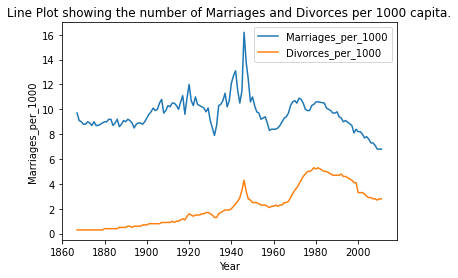

In [110]:
# Line plot to show trend of marriages and divorces over time
fig, ax = plt.subplots()
ax = sns.lineplot(x='Year',y='Marriages_per_1000',data=marriages_divorces_data)
ax1 = sns.lineplot(x='Year',y='Divorces_per_1000', data=marriages_divorces_data)
plt.title("Line Plot showing the number of Marriages and Divorces per 1000 capita.")
plt.legend(['Marriages_per_1000','Divorces_per_1000'])

## Question 7

### Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [111]:
marriages_divorces_data_1900_2000 = marriages_divorces_data.loc[ ((marriages_divorces_data['Year'] >=1900) & (marriages_divorces_data['Year'] <=2000)),['Year','Marriages','Divorces']]
marriages_divorces_data_1900_2000

,Year,Marriages,Divorces
33,1900,709000.0,56000.0
34,1901,742000.0,61000.0
35,1902,776000.0,61000.0
36,1903,818000.0,65000.0
37,1904,815000.0,66000.0
...,...,...,...
129,1996,NaN,NaN
130,1997,2384000.0,1163000.0
131,1998,2244000.0,1135000.0
132,1999,2358000.0,1145245.0


Text(0, 0.5, 'Rate')

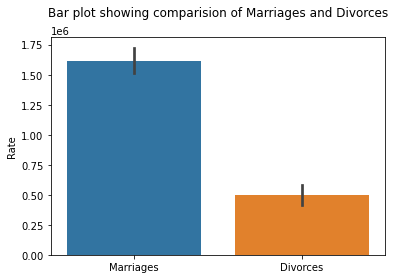

In [112]:
sns.barplot(data=marriages_divorces_data_1900_2000.drop('Year',axis=1))
plt.title("Bar plot showing comparision of Marriages and Divorces\n")
plt.ylabel('Rate')

## Question 8
### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


In [113]:
actors_killed_data = pd.read_csv('actor_kill_counts.csv')
actors_killed_data = actors_killed_data.sort_values(by='Count', ascending=False)
actors_killed_data

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
7,Sylvester Stallone,267
4,Dolph Lundgren,239
8,Tomisaburo Wakayama,226
2,Clint Eastwood,207
6,Nicolas Cage,204
5,Jet Li,201
3,Clive Owen,194
9,Wesley Snipes,193


<AxesSubplot:xlabel='Count', ylabel='Actor'>

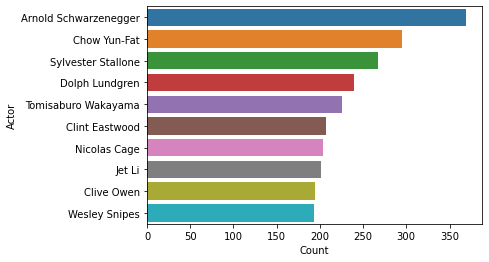

In [114]:
# colours = ['#C4E57D','#2AC280','#FFAE39','#DC5B3B','#52E397','#C5CBA3','#9CD5F6','#6E50D9','#9A5E59','#9BC8F5','#0BBC66',
#            '#FF3D52','#3B19CE','#25974F','#1EAD79','#375E4C','#43C711','#A4CCD9','#AFF373','#392D6A','#792D86','#9CA54B',
#            '#7F03BE','#D5EC95','#FCE2A5']
# palette_color = sns.color_palette('bright')
sns.barplot(x='Count',y='Actor',data=actors_killed_data)

## Question 9
### Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.


In [115]:
roman_emperor_data = pd.read_csv('roman-emperor-reigns.csv')
roman_emperor_data

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


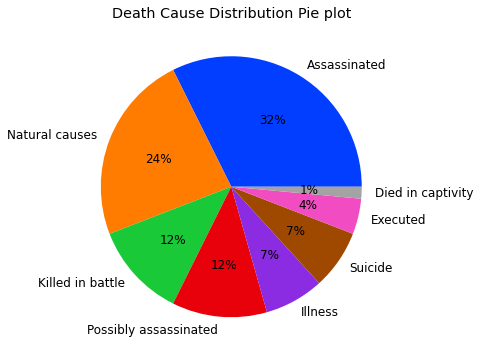

In [119]:
#plotting pie graph
death_class =dict(roman_emperor_data['Cause_of_Death'].sort_values().value_counts())
values = death_class.values()
keys = death_class.keys()
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

plt.title("Death Cause Distribution Pie plot")
#defining size of the picture
plt.rcParams["figure.figsize"] = (12,8)
#setting font-size
plt.rcParams['font.size'] = 12

# plotting data on chart
plt.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

## Question 10
### Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

In [117]:
arcade_revenue_vs_cs_doctorates_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_revenue_vs_cs_doctorates_data

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


<AxesSubplot:xlabel='Computer Science Doctorates Awarded (US)', ylabel='Total Arcade Revenue (billions)'>

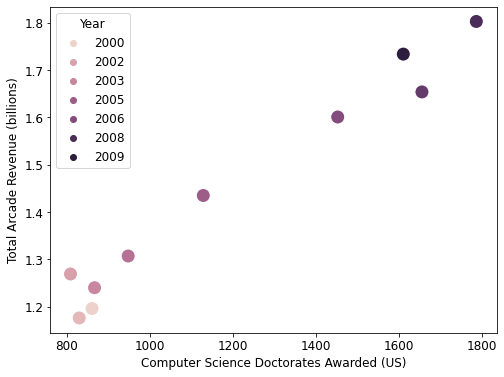

In [118]:
#defining size of the picture
plt.rcParams["figure.figsize"] = (8,6)
sns.scatterplot(y='Total Arcade Revenue (billions)', x='Computer Science Doctorates Awarded (US)', hue='Year', data=arcade_revenue_vs_cs_doctorates_data,s=200)